In [35]:
from kan import *

# формируем KAN: 2D входы, 1D выходы, 5 скрытых нейронов, 
# кубические сплайны и сетка на 5 точках.
model = KAN(width=[1,2,1], grid=5, k=3, seed=0)

f = lambda x: x*np.sin(5*x)
dataset = create_dataset(f, ranges=[-10, 10], train_num=1000, test_num=1000, n_var=1)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

In [36]:
model.train(dataset, opt="LBFGS", steps=50, lamb=0.01, lamb_entropy=10.)

train loss: 1.54e+00 | test loss: 1.54e+00 | reg: 1.93e+01 : 100%|██| 50/50 [00:14<00:00,  3.56it/s]


{'train_loss': [array(3.9996943),
  array(3.72548769),
  array(3.4915045),
  array(3.2593144),
  array(3.07432233),
  array(3.22542917),
  array(3.0980341),
  array(2.99282543),
  array(2.93005286),
  array(2.86642503),
  array(2.77879862),
  array(2.71492396),
  array(2.62113394),
  array(2.44864002),
  array(2.36616942),
  array(2.29454945),
  array(2.23536642),
  array(2.19224762),
  array(2.16810495),
  array(2.12974931),
  array(2.08430199),
  array(2.04816398),
  array(1.99518291),
  array(1.9402165),
  array(1.915309),
  array(1.89708105),
  array(1.87299674),
  array(1.85665311),
  array(1.84115167),
  array(1.82168337),
  array(1.88096034),
  array(1.86942361),
  array(1.8509866),
  array(1.83147145),
  array(1.81650891),
  array(1.82082502),
  array(1.81437128),
  array(1.79668944),
  array(1.78456498),
  array(1.77174672),
  array(1.81701154),
  array(1.7850386),
  array(1.7500033),
  array(1.73101196),
  array(1.70140842),
  array(1.68857966),
  array(1.62331895),
  array(1

Text(0, 0.5, 'Y')

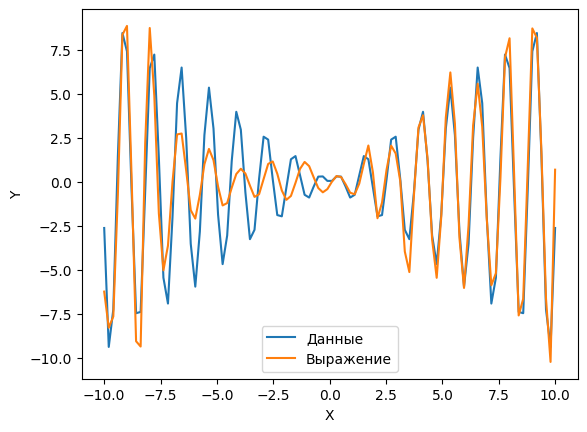

In [37]:
x = torch.linspace(-10, 10, 100)
plt.plot(x, f(x), label='Данные')
plt.plot(x, model(x.reshape(-1,1)).detach().numpy(), label='Выражение')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
# plt.axis('equal')

In [ ]:
# #(torch.Size([1000, 2]), torch.Size([1000, 1]))
# x_train, y_train = [], []
# k = 0
# with open("output.txt", "r") as f:
#     for i in f.readlines():
#         k += 1
#         x, y = i.split(', ')
#         x_train.append(int(x))
#         y_train.append(int(y))

# x_train = np.array(x_train)
# y_train = np.array(y_train)

# dataset = {}
# dataset['train_input'] = x_train
# dataset['test_input'] = x_train
# dataset['train_label'] = y_train
# dataset['test_label'] = y_train

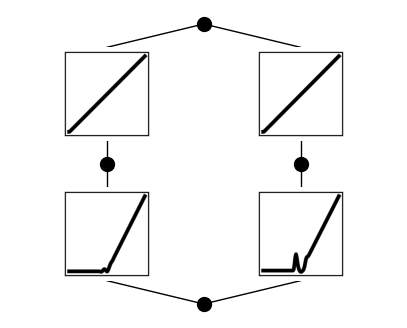

In [35]:
model.plot()

In [50]:
model.auto_symbolic()


fixing (0,0,0) with sin, r2=0.9883012880479248
fixing (0,0,1) with sin, r2=0.9771940994721044
fixing (1,0,0) with abs, r2=0.9999996502807486
fixing (1,1,0) with abs, r2=0.9999996734195434


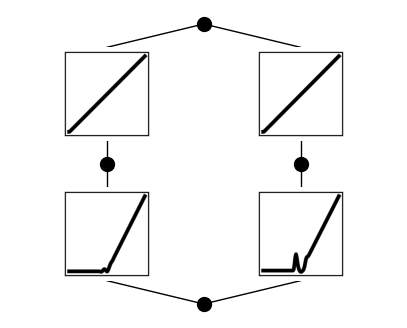

In [44]:
model.prune()
model.plot(mask=True)

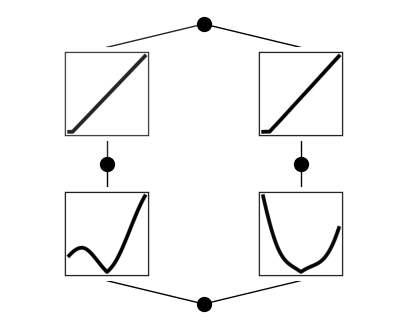

In [45]:
model2 = model.prune()
model2(dataset['train_input']) # it's important to do a forward first to collect activations
model2.plot()

In [46]:
model2.suggest_symbolic(0,0,0)

function , r2
x^2 , 0.8895016793353809
x^4 , 0.855234769858622
x^3 , 0.8397763567413828
sigmoid , 0.8344088776345215
arctan , 0.821165854920895


('x^2',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.8895016793353809)

In [47]:
model2.auto_symbolic()

fixing (0,0,0) with x^2, r2=0.8895016793353809
fixing (0,0,1) with cosh, r2=0.995644762863748
fixing (1,0,0) with abs, r2=0.999881438033063
fixing (1,1,0) with abs, r2=0.9983248650896449


In [ ]:
model2.symbolic_formula()

In [51]:
model.symbolic_formula()

([30.37*Abs(3046.35*sin(2.8*x_1 - 7.41) - 2991.83) + 11.49*Abs(6140.59*sin(2.8*x_1 + 2.0) + 5965.4) - 334.08],
 [x_1])